<a href="https://colab.research.google.com/github/Amanv810/EDA-on-Bank-Customers-Information/blob/main/EDA_Bank_Cust_info_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt # for visualization
import scipy as spy
import statsmodels as stat
import plotly as plot

In [ ]:
# loading bank-cust-info
bci = pd.read_csv('/content/bank.csv')
print(bci.head())
print(bci.tail())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
      age            job  marital  education default  balance housing loan  \
4516   33       services  married

In [ ]:
print(bci.isna().sum())
print(bci.info())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 

In [ ]:
print(bci.describe())
print(bci.shape)

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  
(4521, 17)


In [ ]:
# unique values
bci.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

**Observation** : we can see here that our
data is much clean as we dont need to treat any null values before proceeding to EDA.

**Outlier Detection & Treatment **

In [ ]:
bci.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

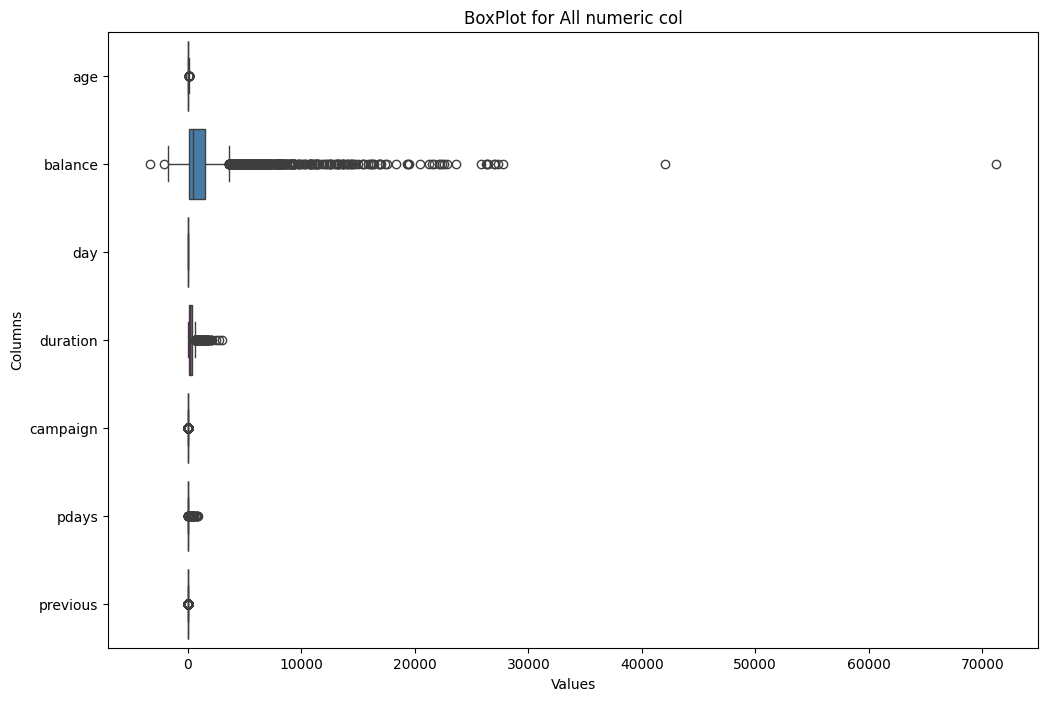

In [ ]:
# using boxplot to easily indentify outlier

numeric_data = bci.select_dtypes(include=[np.number]) # this selects numeric columns only.

plt.figure(figsize=(12,8))  # to adjust the figure accordingly

sbn.boxplot(data =numeric_data ,orient ='h' ,palette='Set1') #'v'defines vertical boxplot& h-horizontal
plt.title('BoxPlot for All numeric col')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

**Observation** : Here we can see that there is an outlier in the balance column .Therefore we will treat these Outliers to ensure we have good model accuracy.

In [ ]:
# using IQR method

Q1 = bci['balance'].quantile(0.25)
Q3 = bci['balance'].quantile(0.75)
IQR =Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bci_cleaned = bci[(bci['balance'] >= lower_bound) & (bci['balance']<= upper_bound)]

We use the IQR method to remove / drop all the outliers that are not within the upper and lower quartile.

Text(0, 0.5, 'Values')

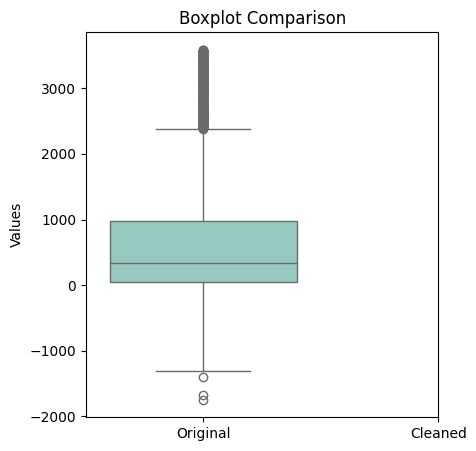

In [ ]:
# Setting  matplotlib figure
plt.figure(figsize=(10,5))

# Boxplot comparison
plt.subplot(1, 2, 1)
#sbn.boxplot(bci=[bci['balance'], bci_cleaned['balance']],palette= 'Set2')
sbn.boxplot([bci['balance'] , bci_cleaned['balance']],palette= 'Set3')
plt.title('Boxplot Comparison')
plt.xticks([0, 1], ['Original', 'Cleaned'])
plt.ylabel('Values')

IN this above boxplot don't know why cleaned data is not visualized properly


**EDA**

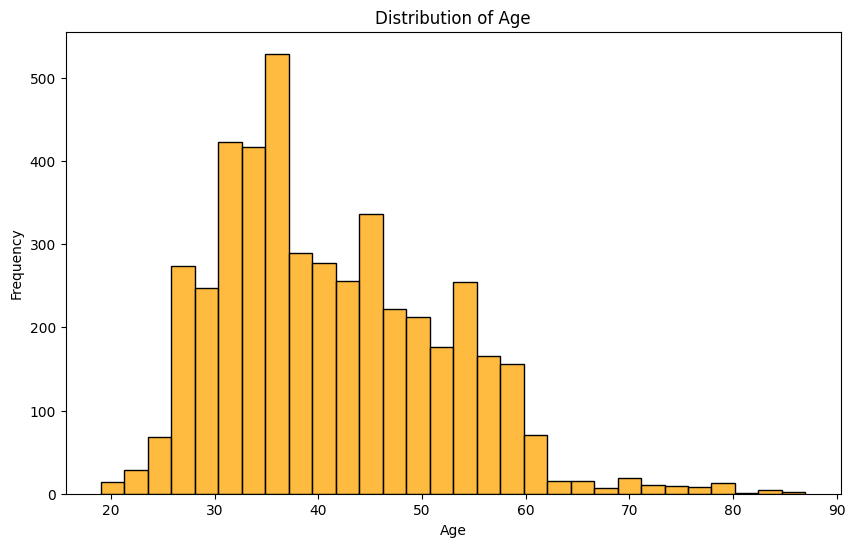

In [ ]:
# Age
plt.figure(figsize =(10,6))
sbn.histplot(bci['age'] ,color ='Orange',bins =30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

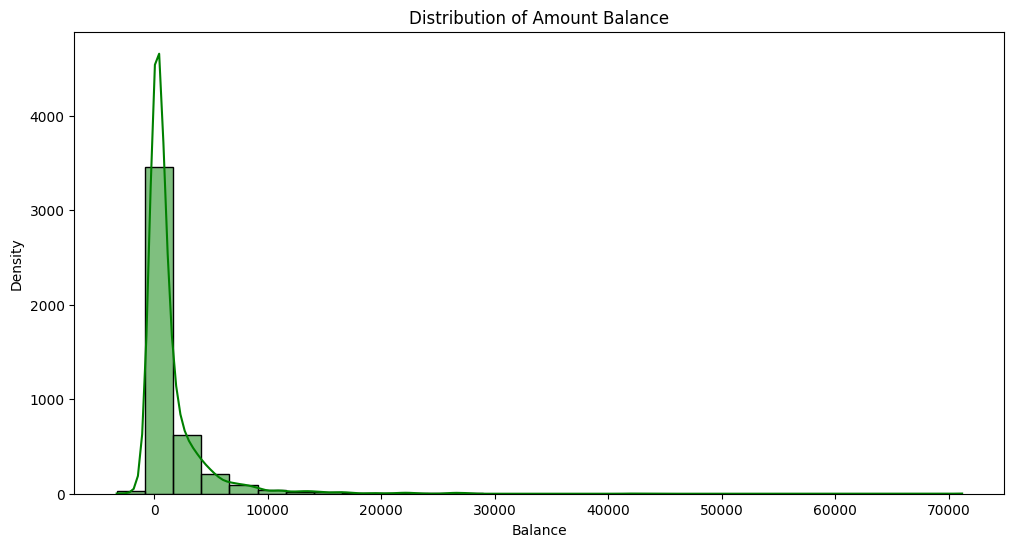

In [ ]:
# Balance
plt.figure(figsize=(12,6))
sbn.histplot(bci['balance'],kde =True ,color= 'green',bins=30) # kde fro a smooth density estimate
plt.title('Distribution of Amount Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

<ipython-input-12-2029a98a4c7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Jobs_count=sbn.countplot(y='job',data=bci,palette='Set2',order=bci['job'].value_counts().index)


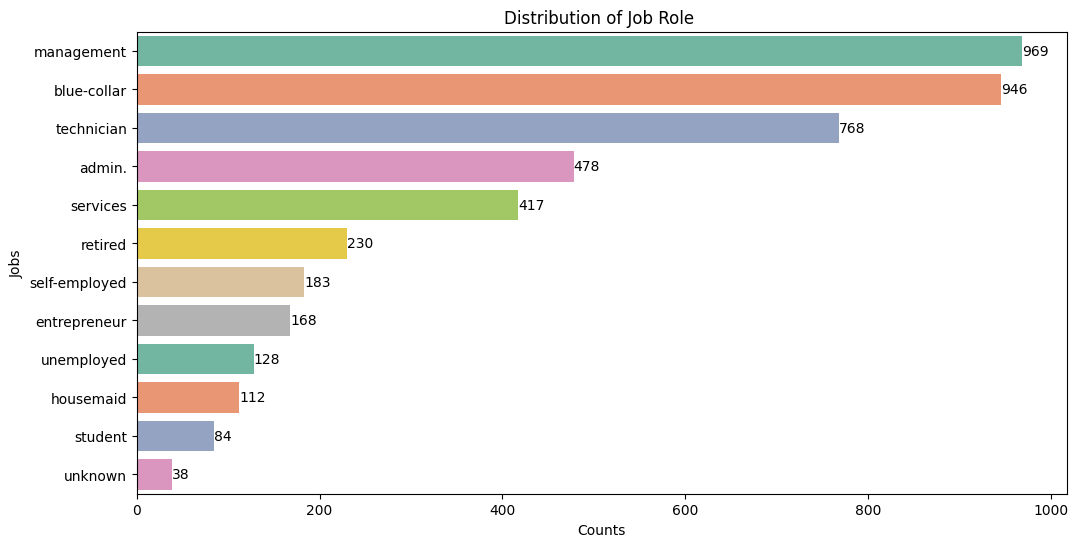

In [ ]:
# Jobs

plt.figure(figsize=(12,6))
Jobs_count=sbn.countplot(y='job',data=bci,palette='Set2',order=bci['job'].value_counts().index)

for vcount in Jobs_count.containers:
  Jobs_count.bar_label(vcount)
plt.title("Distribution of Job Role ")
plt.xlabel('Counts')
plt.ylabel('Jobs')
plt.show()

<ipython-input-13-87567a74bd53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Mar_stat =sbn.countplot(x='marital',data=bci,palette='Set1',order=bci['marital'].value_counts().index)


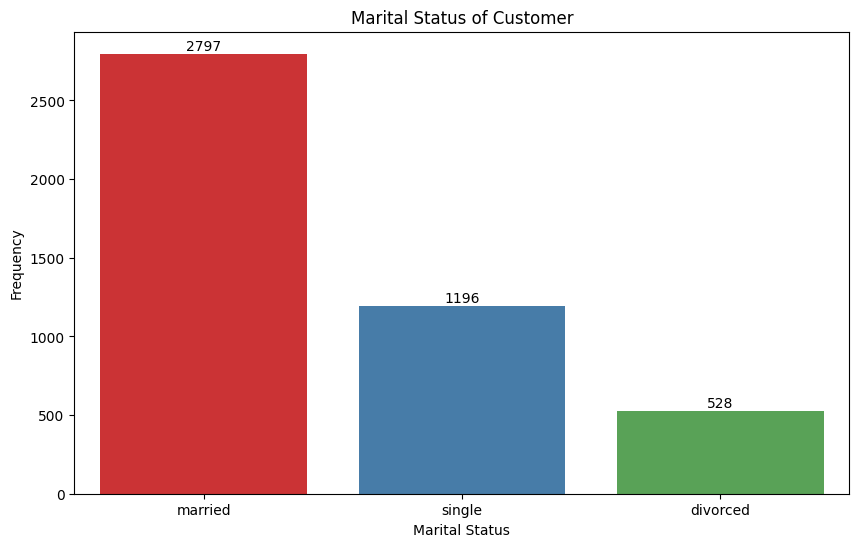

In [ ]:
# Marital Status
plt.figure(figsize=(10,6))
Mar_stat =sbn.countplot(x='marital',data=bci,palette='Set1',order=bci['marital'].value_counts().index)

for ms in Mar_stat.containers:
  Mar_stat.bar_label(ms)
plt.title('Marital Status of Customer')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-ac858097185b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Edu_sum = sbn.countplot(x='education',data =bci,palette='Set2',order =bci['education'].value_counts().index)


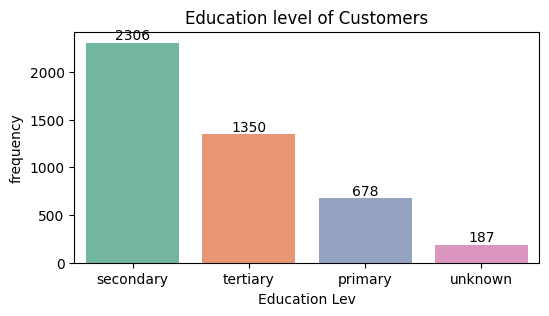

In [ ]:
# Education Level (level sabke niklenge:)
plt.figure(figsize=(6,3))
Edu_sum = sbn.countplot(x='education',data =bci,palette='Set2',order =bci['education'].value_counts().index)
for edu in Edu_sum.containers:
  Edu_sum.bar_label(edu)
plt.title('Education level of Customers')
plt.xlabel('Education Lev')
plt.ylabel('frequency')
plt.show()

**Lets create some features to get some good insights **

In [ ]:
# Age binning to better capture trends
bci_cleaned['age_group'] = pd.cut(bci_cleaned['age'],
 bins=[18, 30, 40, 50, 60, 100],
 labels=['18-30', '31-40', '41-50', '51-60', '60+'])

<ipython-input-15-9d585b44ebcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bci_cleaned['age_group'] = pd.cut(bci_cleaned['age'],


In [ ]:
# Age group interactions based on job
bci_cleaned['age_job_interaction']= bci_cleaned['age'].apply(lambda x: 'young' if x< 40  else 'old') + '_' + bci_cleaned['job']

<ipython-input-16-1369759d5398>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bci_cleaned['age_job_interaction']= bci_cleaned['age'].apply(lambda x: 'young' if x< 40  else 'old') + '_' + bci_cleaned['job']


In [ ]:
# Account balance levels
bci_cleaned['balance_level'] = pd.qcut(bci_cleaned['balance'], q=3, labels=['low', 'medium', 'high'])

<ipython-input-17-546965060fba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bci_cleaned['balance_level'] = pd.qcut(bci_cleaned['balance'], q=3, labels=['low', 'medium', 'high'])


Bi-Variate Analysis

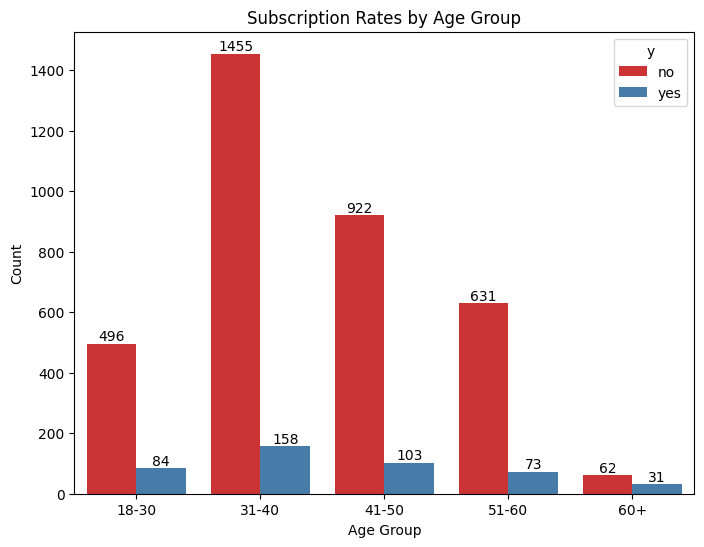

In [ ]:
plt.figure(figsize=(8,6))
age_subs = sbn.countplot(x='age_group',hue='y',data=bci_cleaned,palette ='Set1')
for agesub in age_subs.containers:
  age_subs.bar_label(agesub)
plt.title('Subscription Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

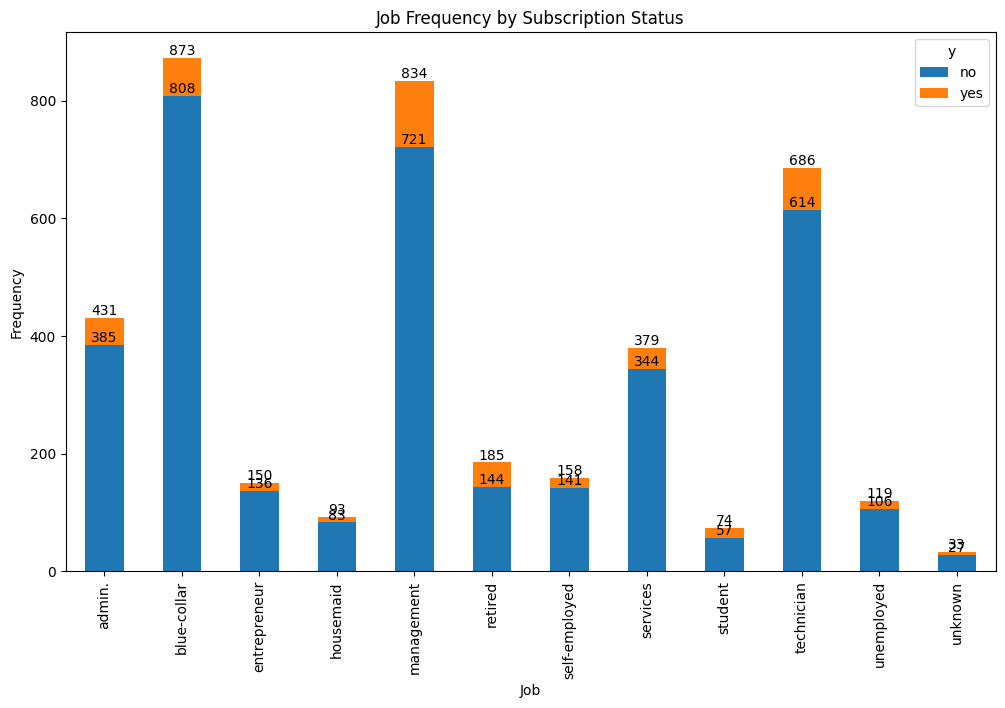

In [ ]:
# crosstab to aggregate data
job_sub_ct = pd.crosstab(bci_cleaned['job'],bci_cleaned['y'])

# Stacked bar chart
job_subs =job_sub_ct.plot(kind='bar',stacked=True,figsize=(12,7))
for jobsubs in job_subs.containers:
  job_subs.bar_label(jobsubs)
plt.title('Job Frequency by Subscription Status')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

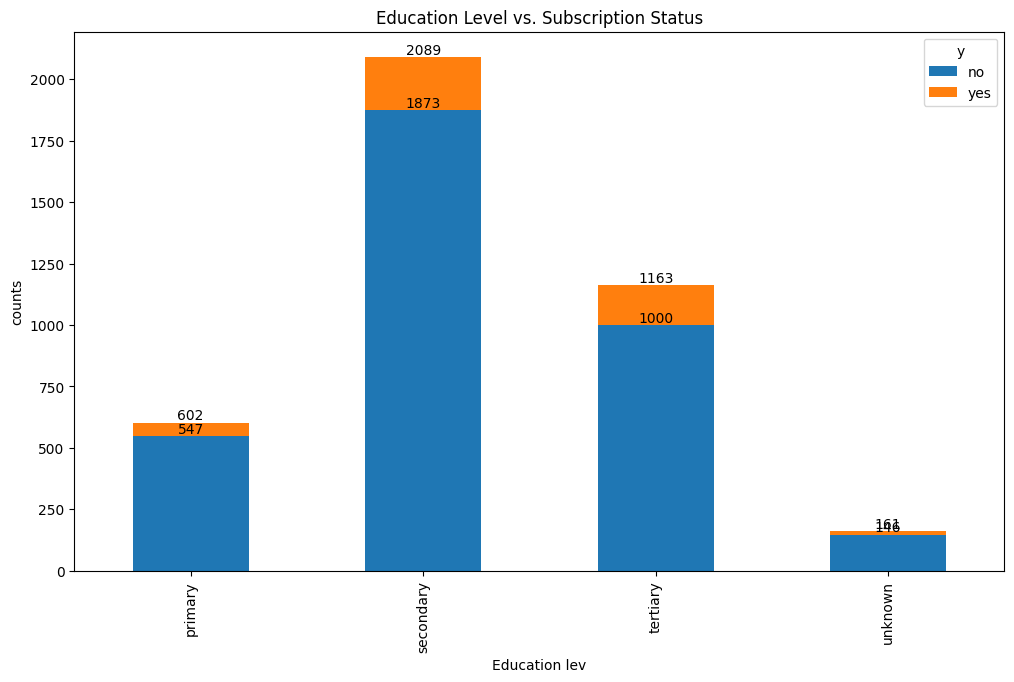

In [ ]:
 # creating a cross-tabulation
education_sub_ct = pd.crosstab(bci_cleaned['education'],bci_cleaned['y'])

# Stacked bar chart
edu_subs =education_sub_ct.plot(kind='bar',stacked=True,figsize=(12,7))
for edusubs in edu_subs.containers:
  edu_subs.bar_label(edusubs)
plt.title('Education Level vs. Subscription Status')
plt.xlabel('Education lev')
plt.ylabel('counts')
plt.show()

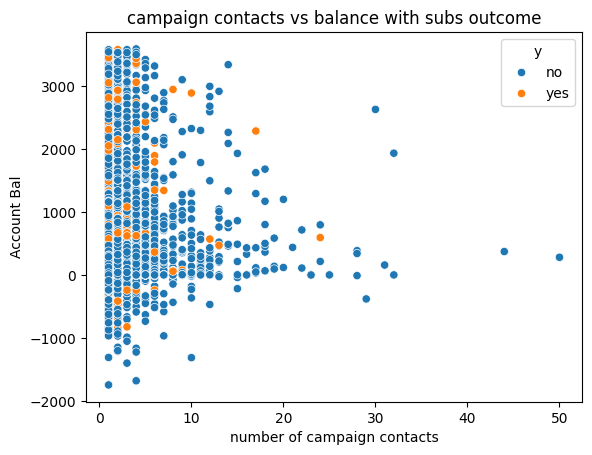

In [ ]:
# Campaign Contacts VS Balance
sbn.scatterplot(x= 'campaign',y='balance',hue='y',data=bci_cleaned)
plt.title('campaign contacts vs balance with subs outcome')
plt.xlabel('number of campaign contacts')
plt.ylabel('Account Bal')
plt.show()

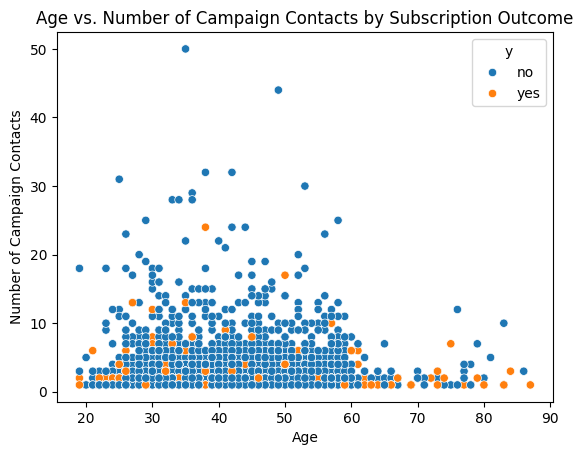

In [ ]:
# number of contacts based on age and subscription
sbn.scatterplot(x='age', y='campaign', hue='y', data=bci_cleaned)
plt.title('Age vs. Number of Campaign Contacts by Subscription Outcome')
plt.xlabel('Age')
plt.ylabel('Number of Campaign Contacts')
plt.show()

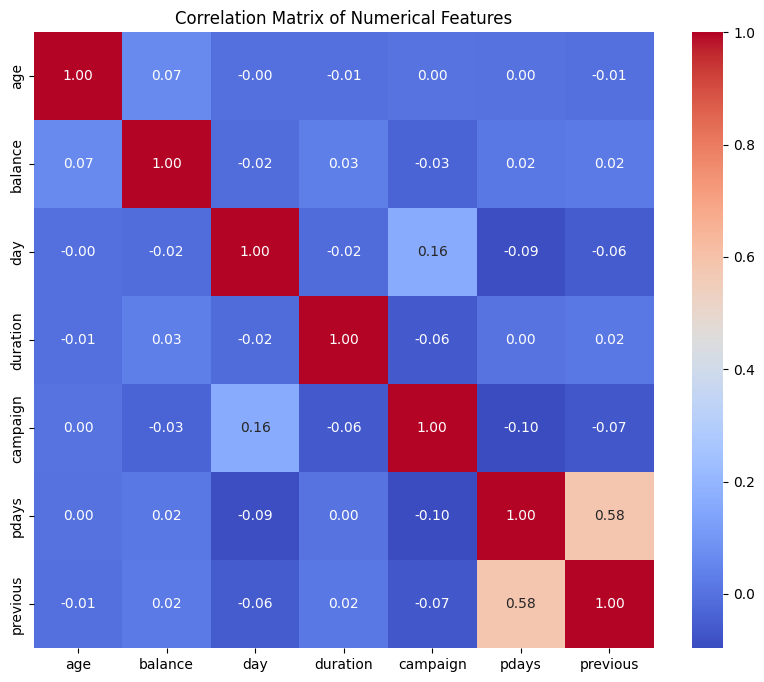

In [ ]:
# Select numerical columns including engineered ones
numerical_data1 = bci_cleaned.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_data1.corr()
# Heatmap
plt.figure(figsize=(10,8))
sbn.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

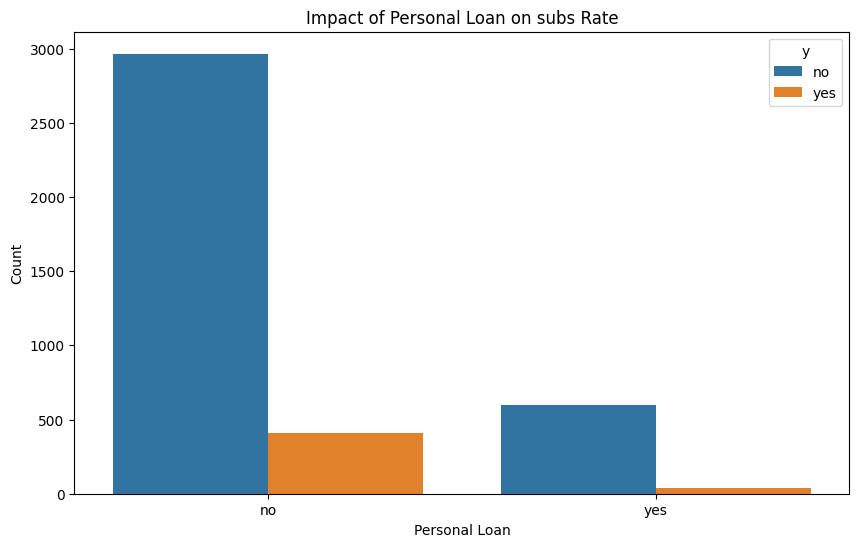

In [ ]:
# Personal Loan
plt.figure(figsize=(10,6))
sbn.countplot(x='loan',hue='y',data=bci_cleaned)
plt.title('Impact of Personal Loan on subs Rate')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

 **Multi-Variate Analysis**

<ipython-input-25-5b69083d4a4f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sbn.countplot(x='job',hue ='education',data=bci_cleaned[bci['y'] == 'yes'])


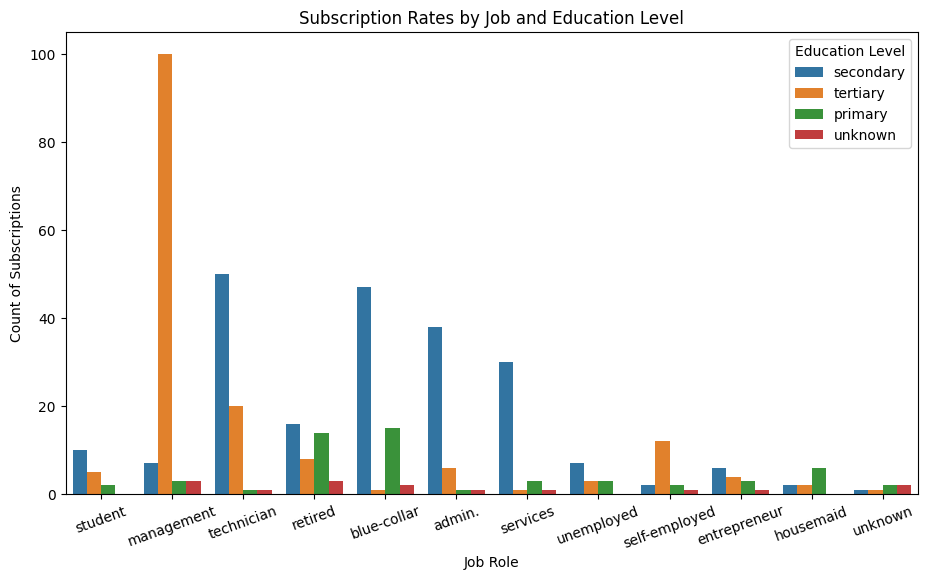

In [ ]:
# creating a clustered Bar chart
plt.figure(figsize=(11,6))
sbn.countplot(x='job',hue ='education',data=bci_cleaned[bci['y'] == 'yes'])
plt.title('Subscription Rates by Job and Education Level')
plt.xlabel('Job Role')
plt.ylabel('Count of Subscriptions')
plt.xticks(rotation=20)
plt.legend(title='Education Level')
plt.show()

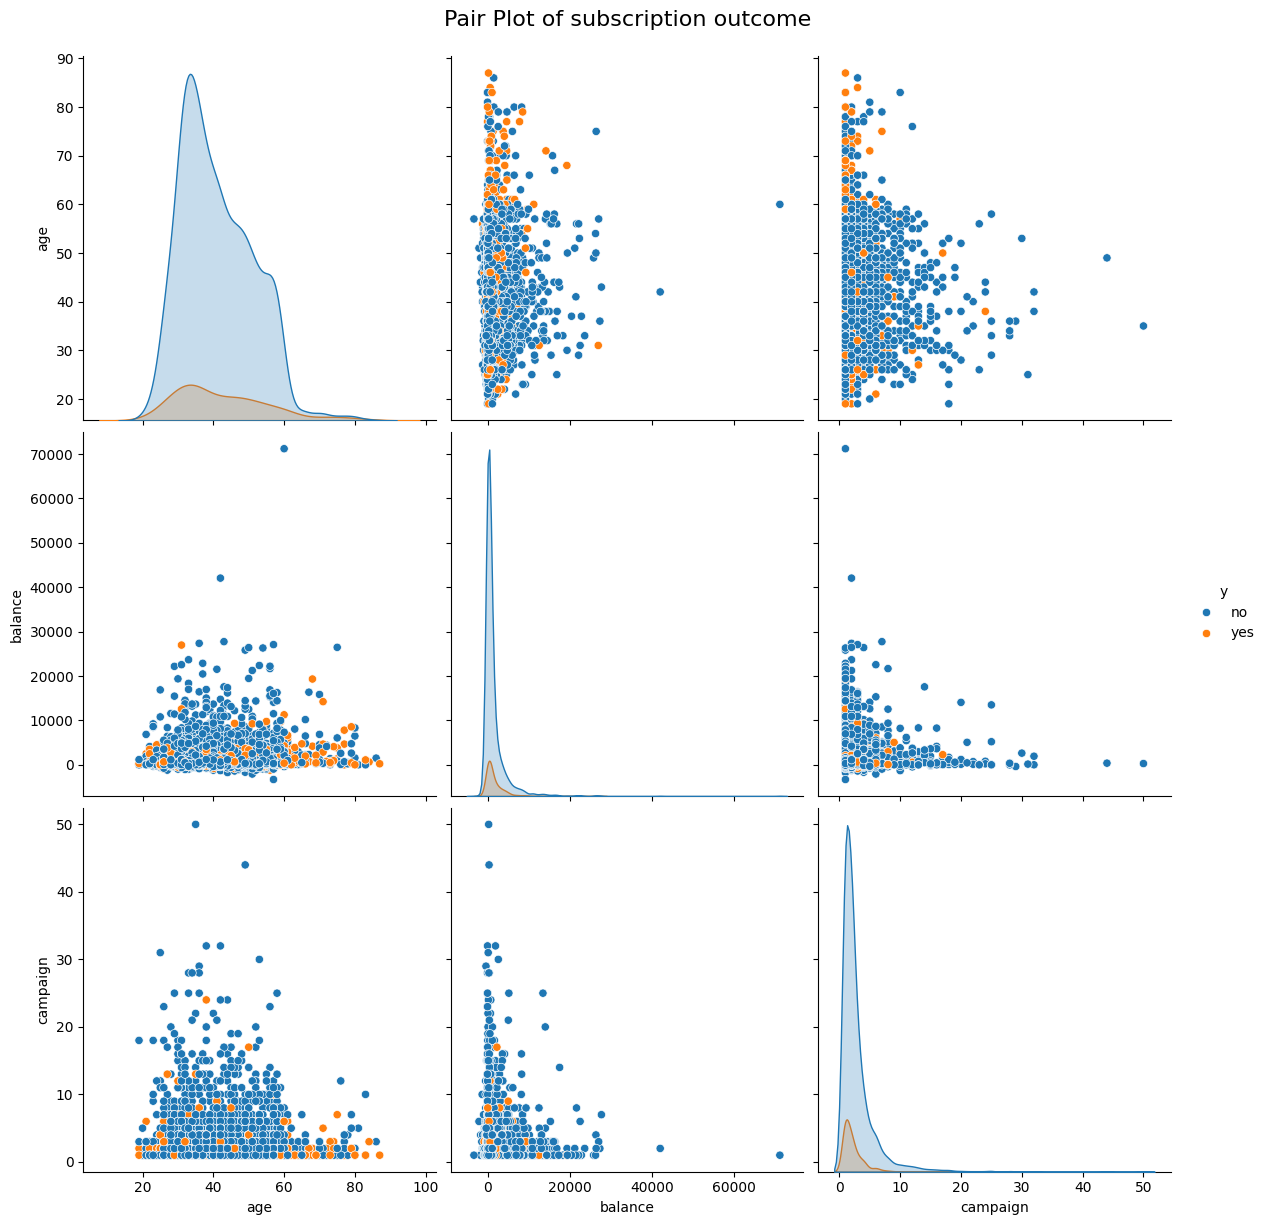

In [ ]:
# selecting a subset of features for clarity
features = ['age','balance','education','campaign','y']

sbn.pairplot(bci[features],hue='y',height=4,aspect=1)
plt.suptitle('Pair Plot of subscription outcome',size=16,y =1.02)
plt.show()

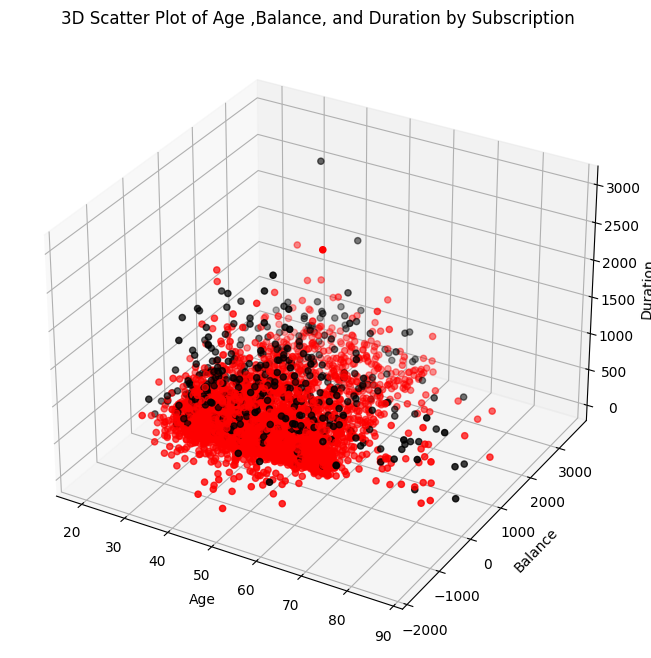

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize= (10,8))
ax =fig.add_subplot(111,projection ='3d')

colors ={'yes':'black','no':'red'}

# 3d scatter plot
ax.scatter(bci_cleaned['age'],bci_cleaned['balance'],bci_cleaned['duration'],c=bci_cleaned['y'].map(colors),marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Duration')
ax.set_title('3D Scatter Plot of Age ,Balance, and Duration by Subscription')

plt.show()

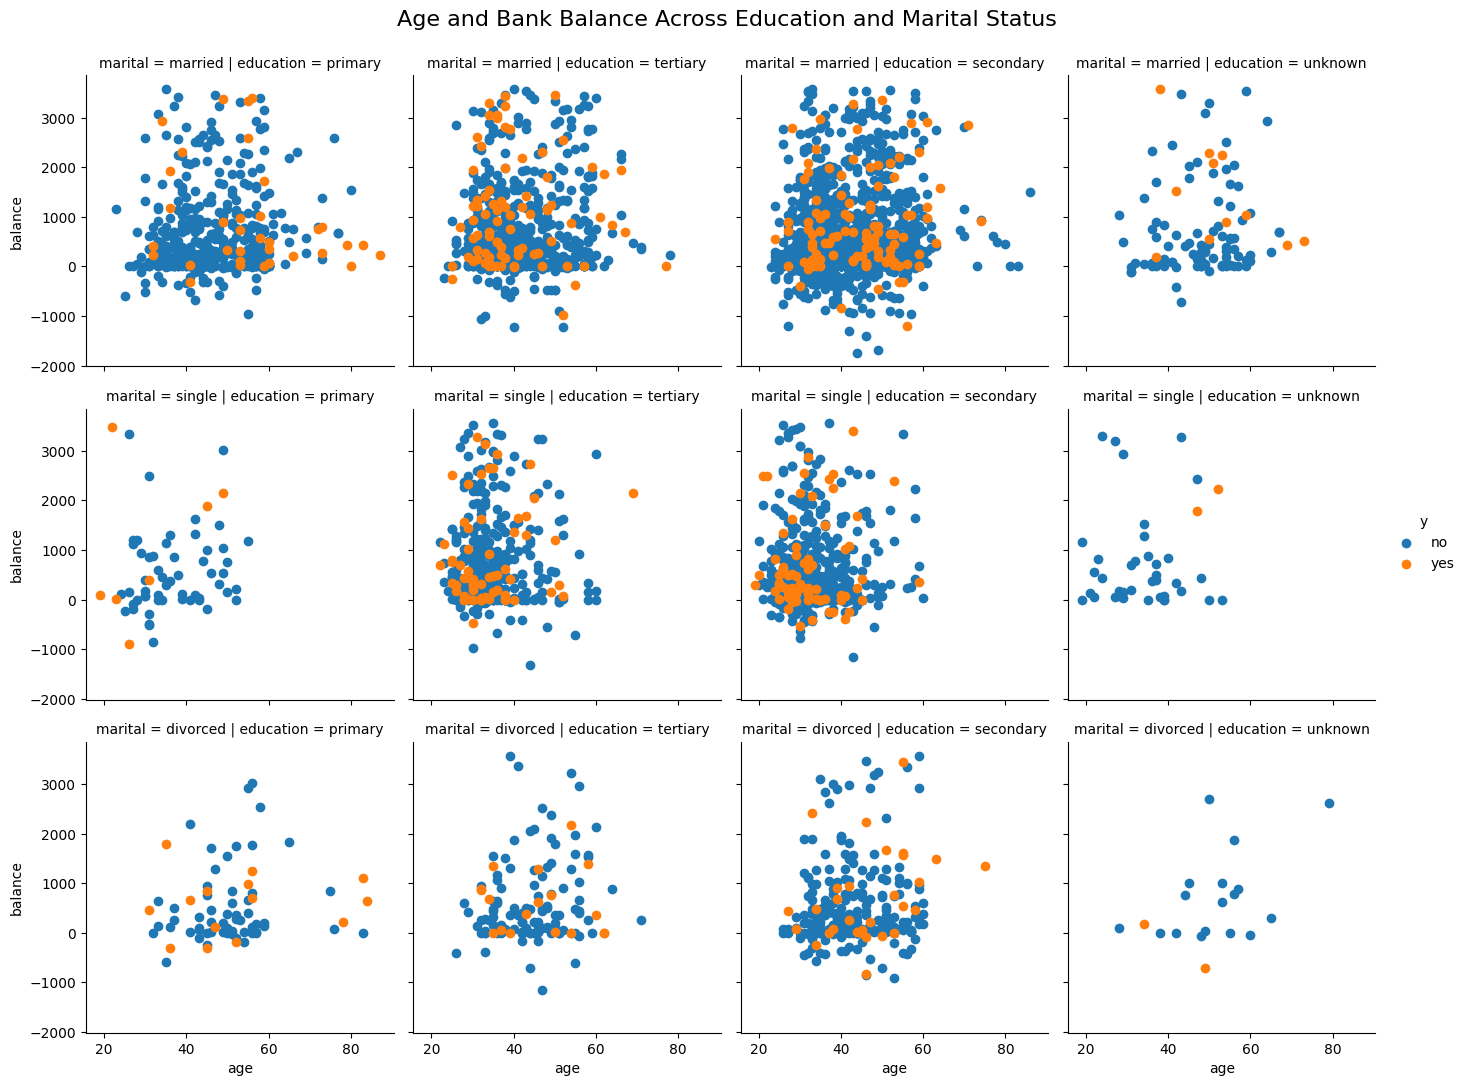

In [ ]:
# scatterplot on age and Bank Balance distribution based on Education level& Marital status

sca=sbn.FacetGrid(bci_cleaned, col='education',row='marital',hue='y',height=3.5)
sca.map(plt.scatter , 'age', 'balance').add_legend()
sca.fig.suptitle('Age and Bank Balance Across Education and Marital Status',size=16,y=1.03)
plt.show()